# Titanic - Machine Learning from Disaster

In [202]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
# Importing classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [179]:
# Read data
train_data = pd.read_csv("train.csv")
print(train_data.head())  # Displaying the first few rows of the DataFrame

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [180]:
# Display the data types of each column in the dataframe
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [181]:
# Check for missing values in each column of the dataframe
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [182]:
# Storing descriptive statistics of the training data in a DataFrame called df
df = train_data.describe()
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [203]:
# Replacing categorical values in 'Sex' and 'Embarked' columns with numerical equivalents
train_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

# Filling null values in the 'Age' column with the mean age
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)


# Filling null values in the 'Embarked' column with the mode
print(train_data['Embarked'].mode())
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


# Displaying the first few rows of the modified DataFrame
train_data.head()

0    0.0
Name: Embarked, dtype: float64


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,38.0,1,0,71.2833,1.0
2,3,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,35.0,1,0,53.1000,0.0
4,5,3,0,35.0,0,0,8.0500,0.0


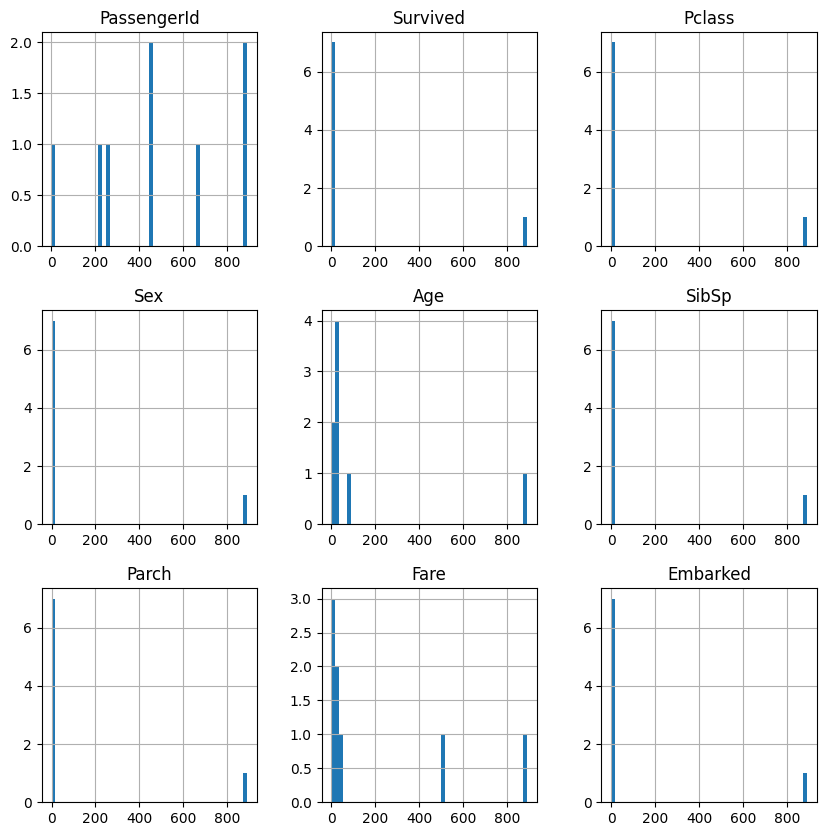

In [184]:
# Setting up inline plotting for matplotlib
%matplotlib inline

# Importing matplotlib
import matplotlib.pyplot as plt

# Storing descriptive statistics of the modified training data in a DataFrame called df
df = train_data.describe()

# Plotting histograms for each numerical attribute with 50 bins and a figure size of 10x10
df.hist(bins=50, figsize=(10, 10))

# Displaying the plots
plt.show()

In [185]:
# Copying the 'Survived' column to y and dropping unnecessary columns from train_data
y = train_data.Survived.copy()
train_data = train_data.drop(['Name','Ticket','Survived','Cabin'], axis=1)
# Display the first few rows of the modified dataframe
train_data.head()

# Splitting the dataset into train and test sets with a test size of 20% and a random state of 123
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size = 0.2, random_state=123)

In [186]:
# Rechecking for missing values in each column of the modified dataframe
train_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [205]:
# Importing machine learning models for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [206]:
# Initializing classifiers
Dt_clf = DecisionTreeClassifier(random_state =123)
Rf_clf = RandomForestClassifier(random_state =123)
LR_clf = LogisticRegression(random_state =123)

In [207]:
# Fitting the classifiers to the training data
Dt_clf.fit(X_train, y_train)
Rf_clf.fit(X_train, y_train)
LR_clf.fit(X_train, y_train)

C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

DT
Accuracy: 0.7263
Precision: 0.7488
Recall: 0.7263
F1 Score: 0.7311

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       114
           1       0.60      0.75      0.67        65

    accuracy                           0.73       179
   macro avg       0.72      0.73      0.72       179
weighted avg       0.75      0.73      0.73       179


Confusion Matrix:
[[81 33]
 [16 49]]
RF
Accuracy: 0.8380
Precision: 0.8375
Recall: 0.8380
F1 Score: 0.8377

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       114
           1       0.78      0.77      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
[[100  14]
 [ 15  50]]
LR
Accuracy: 0.8156
Precision: 0.8136
Recall: 0.8156
F1 Score: 0.8139

Classif

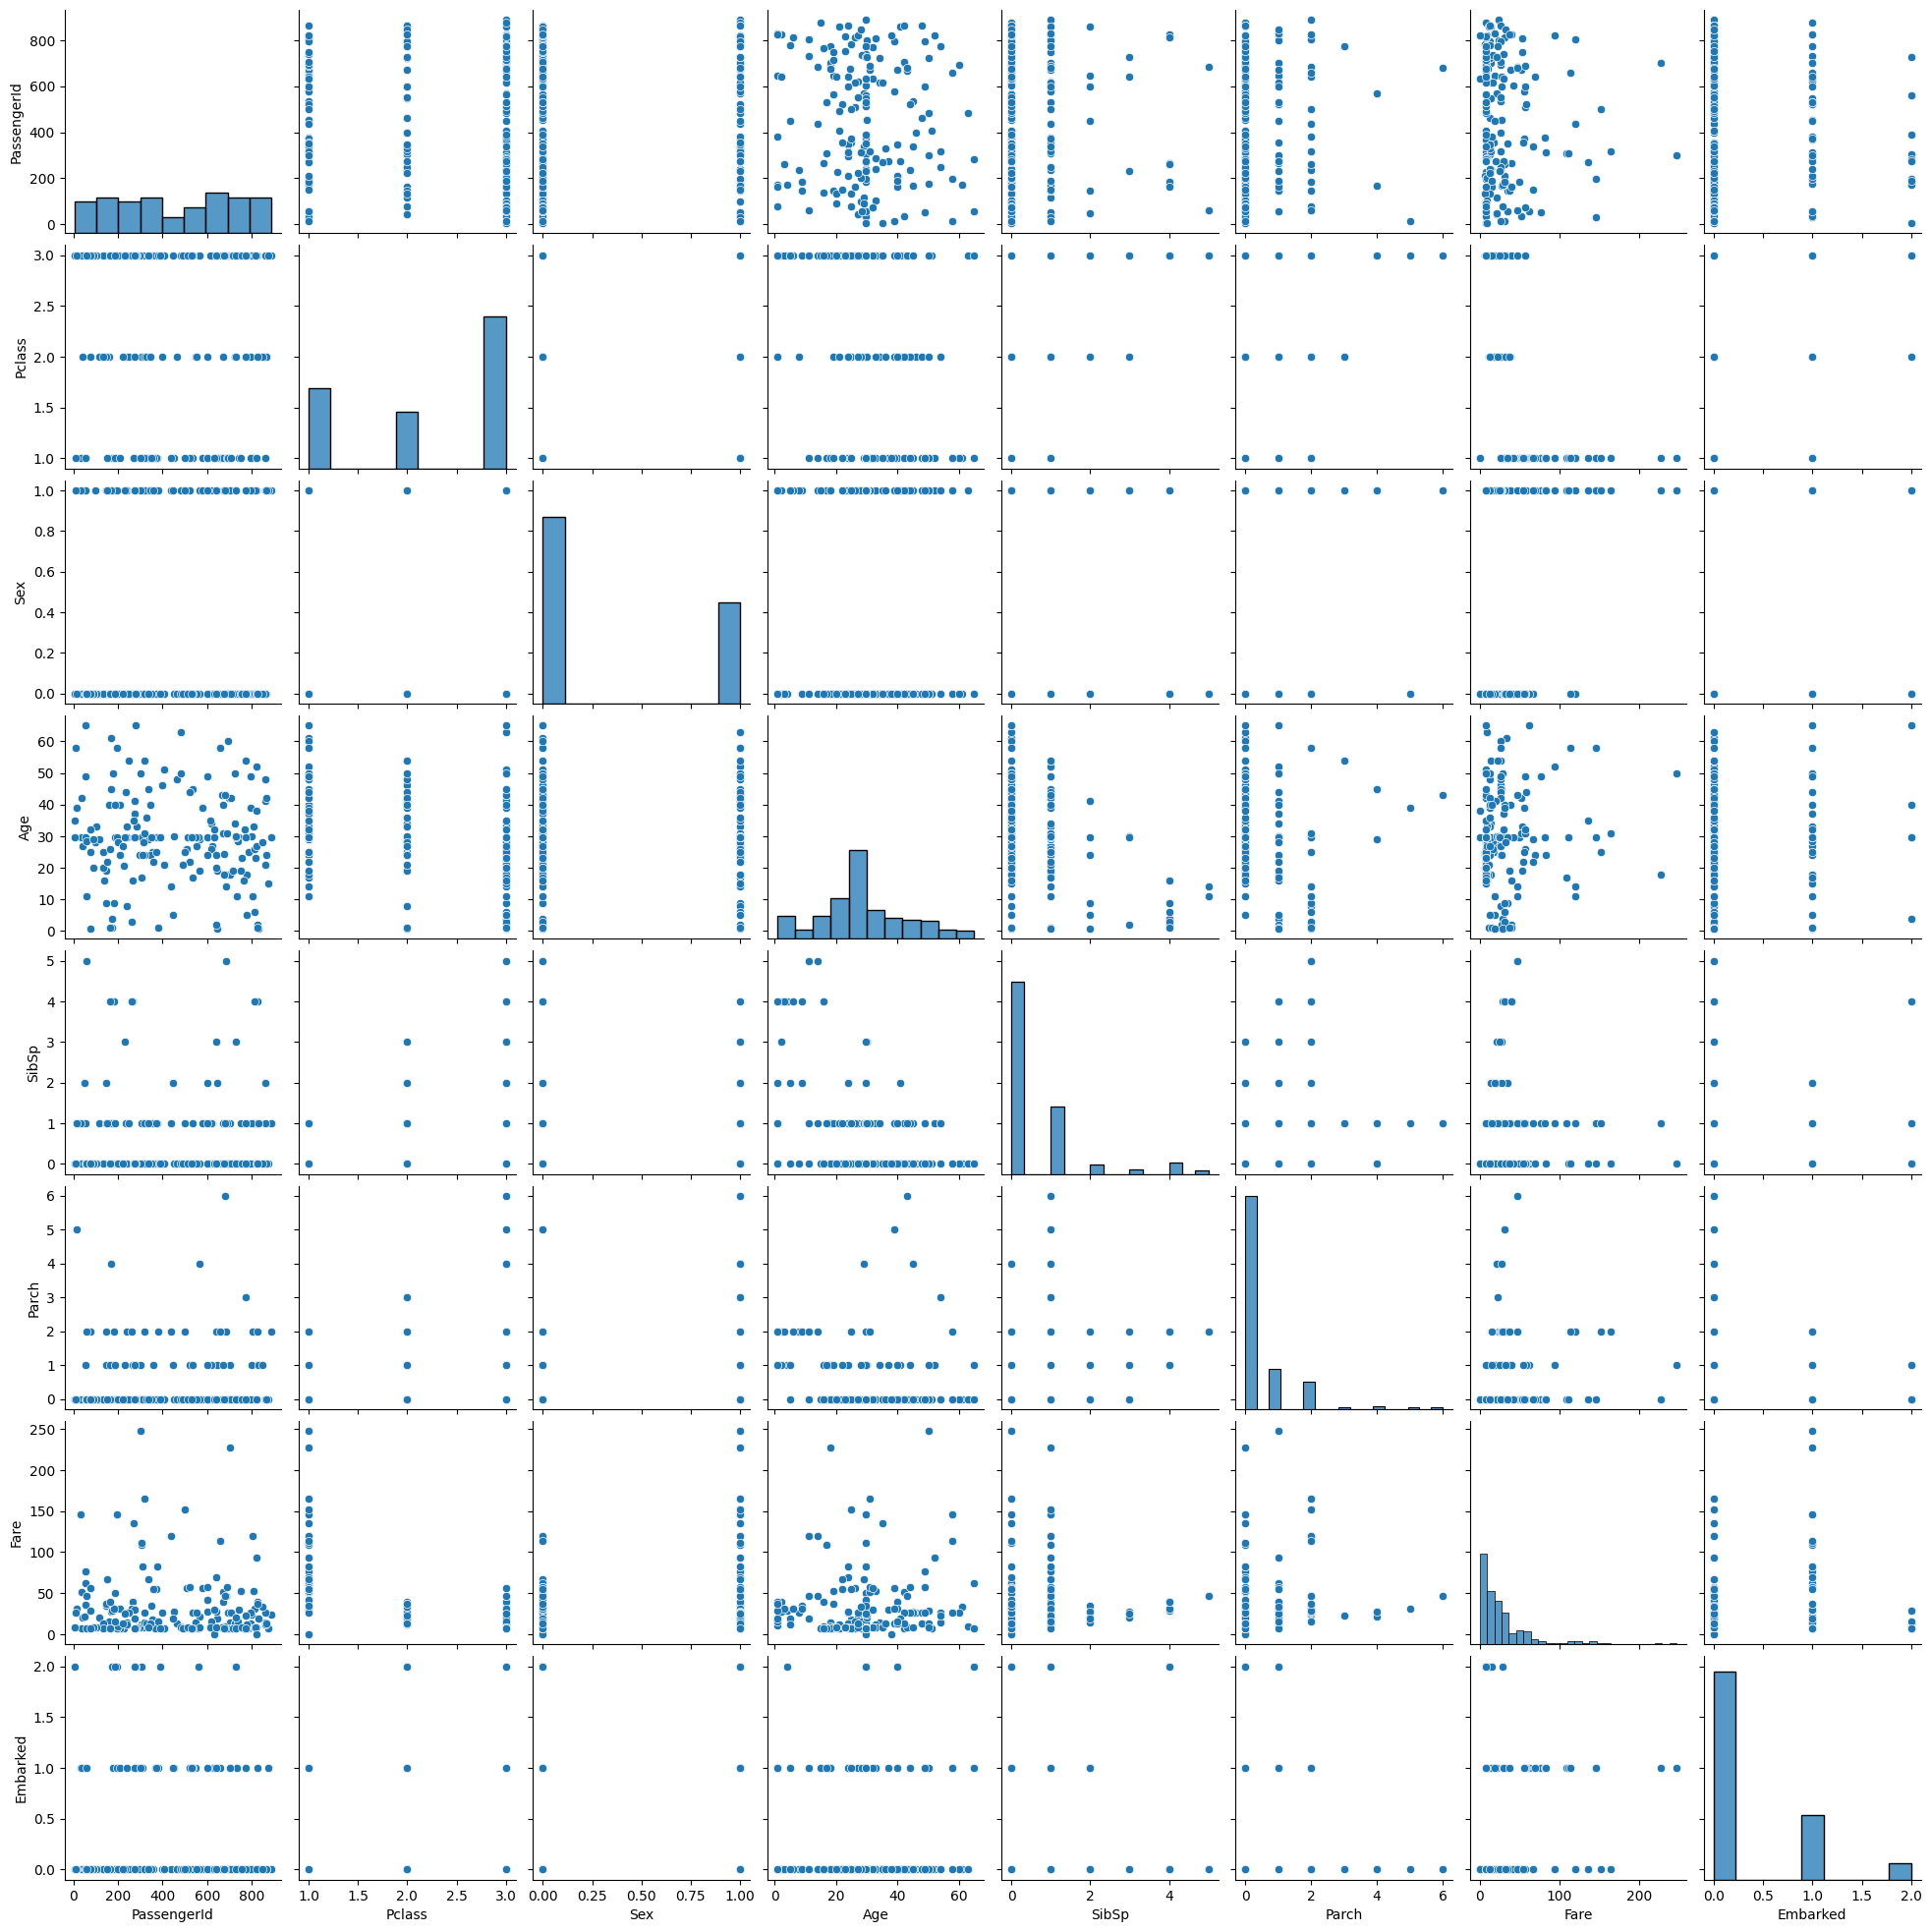

In [208]:
def evaluate(model, X_test, y_test):
   
    # Predict labels for the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return accuracy for later use
    return accuracy
    

# Now can use the evaluate function with your models
print("DT")
DT_accuracy = evaluate(Dt_clf, X_test, y_test)

print("RF")
Rn_accuracy = evaluate(Rf_clf, X_test, y_test)

print("LR")
LR_accuracy = evaluate(LR_clf, X_test, y_test)

# accuracy scores stored in variables for later use
print(f"DT Accuracy: {DT_accuracy:.4f}")
print(f"RF Accuracy: {Rn_accuracy:.4f}")
print(f"LR Accuracy: {LR_accuracy:.4f}")

# Scatter plot to visualize relationships between variables in the test set
sns.pairplot(X_test)
plt.show()

In [190]:
# Retrieve the current hyperparameters of the Random Forest classifier
Rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [209]:
# Define the hyperparameter grid for Random Forest hyperparameter tuning
param_dict = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]

}

In [210]:
# Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [211]:
# Creating a GridSearchCV object for Random Forest hyperparameter tuning
grid_sc = GridSearchCV(RandomForestClassifier(random_state =123),
                       param_grid = param_dict,
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=10)

In [212]:
# Fitting the GridSearchCV object to the training data to search for the best hyperparameters
grid_sc.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2880 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1835 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklea

GridSearchCV(estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=10)

In [232]:
# Retrieve the best cross-validated accuracy score from the GridSearchCV
grid_search.best_score_

0.8048261597557372

In [222]:
# Retrieve the best hyperparameters found by GridSearchCVgrid_sc.best_params_
grid_search.best_params_

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

In [223]:
# Retrieve the best estimator (model) found by GridSearchCV
grid_search.best_estimator_

LogisticRegression(C=0.1, random_state=123, solver='newton-cg')

In [228]:
# Assigning the best estimator (model) found by GridSearchCV to a new variable
LR_new = grid_search.best_estimator_

Accuracy: 0.8380
Precision: 0.8368
Recall: 0.8380
F1 Score: 0.8371

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       114
           1       0.79      0.75      0.77        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
[[101  13]
 [ 16  49]]


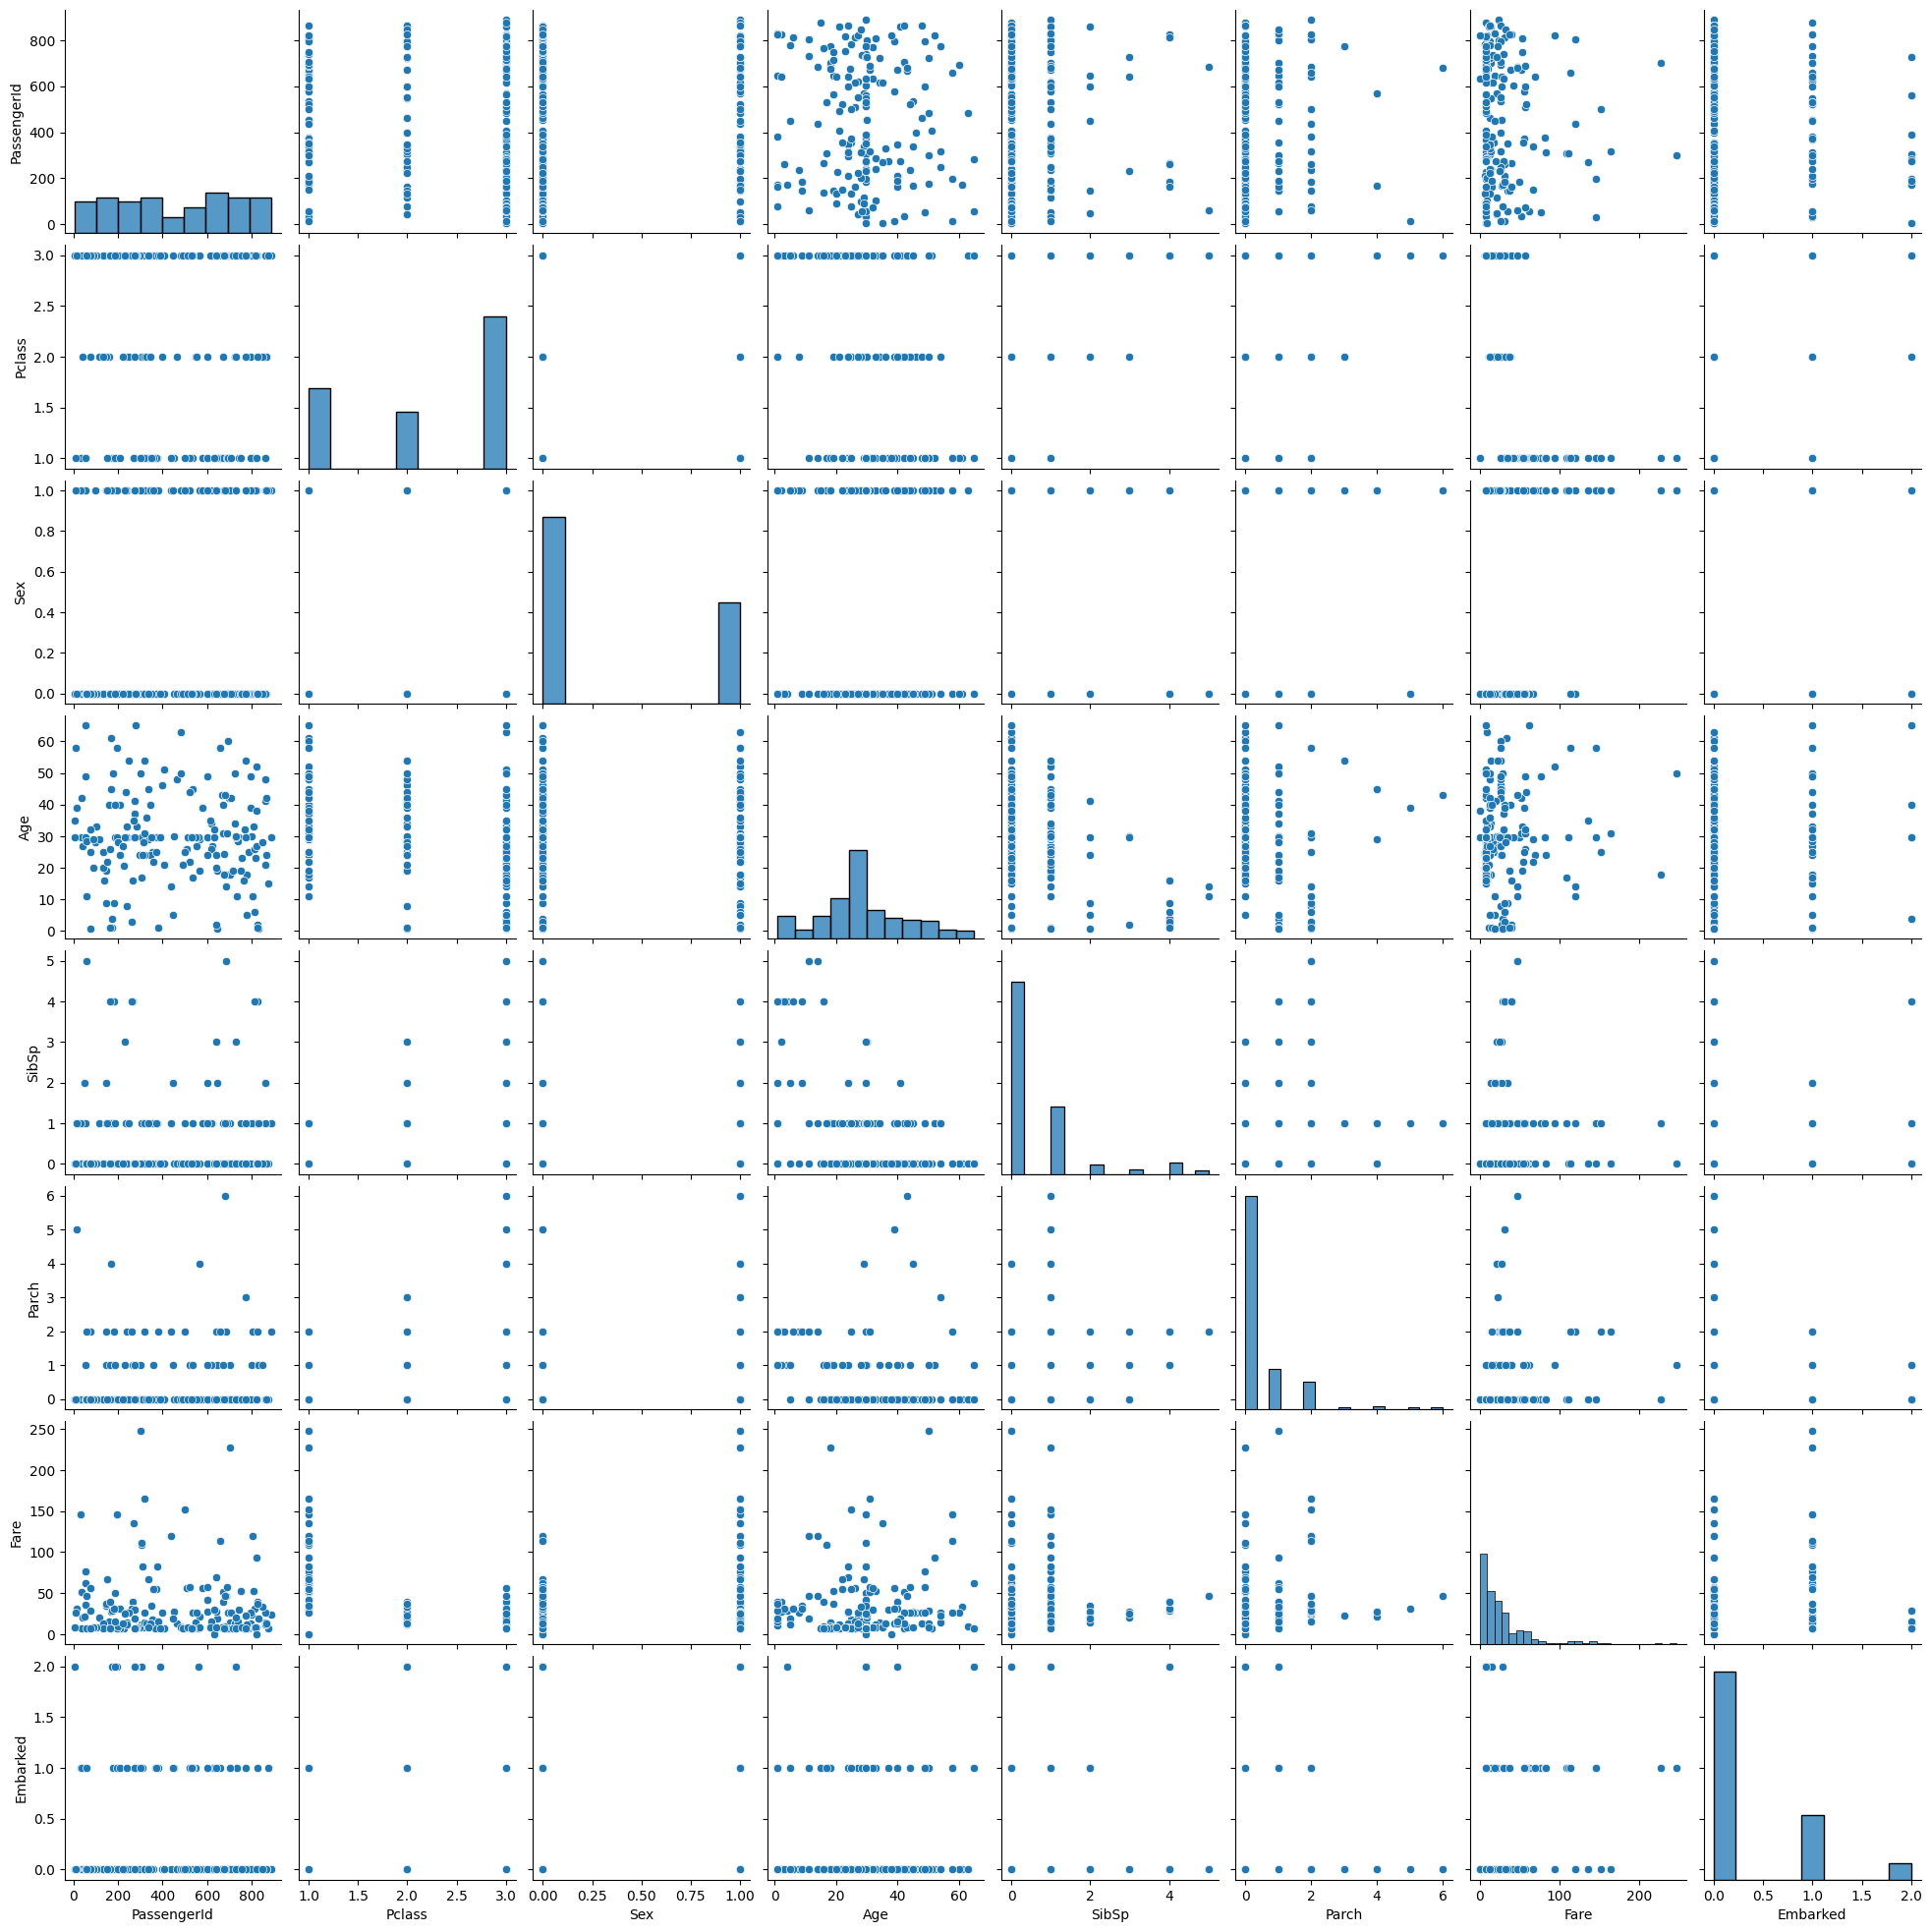

In [229]:
# Calculating accuracy of the new logistic regression model and storing it in LR_new_accuracy
LR_new_accuracy = evaluate(LR_new, X_test, y_test)
# Scatter plot to visualize relationships between variables in the test set
sns.pairplot(X_test)
plt.show()

In [230]:
# Evaluating the logistic regression classifier (LR_clf) using the test data (X_test, y_test)
evaluate(LR_clf, X_test, y_test)

Accuracy: 0.8156
Precision: 0.8136
Recall: 0.8156
F1 Score: 0.8139

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       114
           1       0.77      0.71      0.74        65

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
[[100  14]
 [ 19  46]]


0.8156424581005587

In [227]:
# Retrieve the current hyperparameters of the Logistic Regression classifier
LR_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [103]:
# Define the hyperparameter grid for Logistic Regression hyperparameter tuning
param_dict2 = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

param_dict2

{'penalty': ['l1', 'l2'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'fit_intercept': [True, False],
 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']}

In [98]:
# Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [104]:
# Creating a GridSearchCV object for Logistic Regression hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(random_state =123),
                          param_grid=param_dict2,
                          scoring='accuracy',
                          n_jobs=-1,
                          verbose=10
                          )

In [105]:
# Fitting the GridSearchCV object to the training data to search for the best hyperparameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sandun\

GridSearchCV(estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=10)

In [118]:
grid_search.best_score_

0.8048261597557372

In [119]:
grid_search.best_params_

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

In [117]:
# Assign the best estimator found by GridSearchCV to a new variable (Rn_New)
grid_search.best_estimator_

LogisticRegression(C=0.1, random_state=123, solver='newton-cg')

In [122]:
Lr_model = grid_search.best_estimator_

In [123]:
Lr_model1=evaluate(Lr_model,X_test,y_test)

Accuracy: 0.8380
Precision: 0.8368
Recall: 0.8380
F1 Score: 0.8371

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       114
           1       0.79      0.75      0.77        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
[[101  13]
 [ 16  49]]


In [129]:
# Calculate the accuracy of the predictions

val_accuracy = accuracy_score(y_test, val_predictions1)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")


Validation Accuracy: 0.8715


In [130]:
# Calculating the mean squared error between the true labels and the predicted labels
mse = mean_squared_error(y_test, val_predictions)

# Printing the mean squared error
print(f"Mean Squared Error (MSE): {mse:.4f}") m

Mean Squared Error (MSE): 0.1285


In [ ]:
# Importing the necessary library
from sklearn.metrics import mean_squared_error

# Calculating the mean squared error (MSE) between the true test labels (y_test) and the predicted values (val_predictions)
mse = mean_squared_error(y_test, val_predictions)

# Printing the MSE with four decimal places
print(f"Mean Squared Error (MSE): {mse:.4f}")

In [ ]:
# Importing necessary library
import pandas as pd

# Loading test data from the CSV file "test.csv" into a DataFrame
test_data = pd.read_csv("test.csv")

# Displaying the first few rows of the test data
print(test_data.head())

# Printing the data types of each column in the test data
print(test_data.dtypes)

In [ ]:
# Dropping unnecessary columns 'Name', 'Ticket', and 'Cabin' from the test data
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Replacing categorical values with numerical equivalents for 'Sex' and 'Embarked'
test_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

# Filling missing values in 'Age' and 'Fare' columns with their respective means
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

# Filling missing values in 'Embarked' column with the mode value
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
print(test_data.dtypes)

In [ ]:
# Checking for missing values in the test data and summing up the count of null values in each column
test_data.isnull().sum()

In [ ]:
# Store test PassengerIds for later use
test_passenger_ids = test_data["PassengerId"]

In [ ]:
# Making predictions on the test set using the trained model Rn_New
test_predictions = Rn_New.predict(test_data)

# Creating a submission DataFrame containing PassengerId and corresponding predicted survival values
submission_df = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": test_predictions
})

# Displaying the first 20 rows of the submission DataFrame
submission_df.head(20)

In [ ]:
# Saving the submission DataFrame to a CSV file named "Advanced_model_results.csv" without including the index
submission_df.to_csv("Advanced_model_results.csv", index=False)

# Printing a message to indicate that the submission file has been saved successfully
print("Submission file saved successfully.")

In [ ]:
# create pikel file
import pickle

pickle.dump(Rn_New, open('./model.h5', 'wb'))